<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.782630,-0.007206,89.775424,89.779321,-0.003898
1,0.0,1.0,66.157233,-0.028074,76.129160,76.154584,-0.025425
2,0.0,2.0,57.323877,0.019032,67.342909,67.321655,0.021254
3,0.0,3.0,77.195003,-0.025484,87.169519,87.191820,-0.022301
4,0.0,4.0,86.413969,-0.009403,96.404566,96.410339,-0.005773
...,...,...,...,...,...,...,...
59995,999.0,55.0,28.941321,0.046163,38.987484,38.937148,0.050336
59996,999.0,56.0,43.976980,0.036224,54.013204,53.973547,0.039657
59997,999.0,57.0,91.175624,-0.006283,101.169340,101.174511,-0.005171
59998,999.0,58.0,21.964157,-0.039958,31.924199,31.959642,-0.035443


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    79.782630 -0.007206   89.775424   89.779321 -0.003898
      1.0    66.157233 -0.028074   76.129160   76.154584 -0.025425
      2.0    57.323877  0.019032   67.342909   67.321655  0.021254
      3.0    77.195003 -0.025484   87.169519   87.191820 -0.022301
      4.0    86.413969 -0.009403   96.404566   96.410339 -0.005773
...                ...       ...         ...         ...       ...
999.0 55.0   28.941321  0.046163   38.987484   38.937148  0.050336
      56.0   43.976980  0.036224   54.013204   53.973547  0.039657
      57.0   91.175624 -0.006283  101.169340  101.174511 -0.005171
      58.0   21.964157 -0.039958   31.924199   31.959642 -0.035443
      59.0   83.802523  0.003705   93.806228   93.801049  0.005180

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    79.782630 -0.007206   89.775424   89.779321 -0.003898
      1.0    66.157233 -0.028074   76.129160   76.154584 -0.025425
      2.0    57.323877  0.019032   67.342909   67.321655  0.021254
      3.0    77.195003 -0.025484   87.169519   87.191820 -0.022301
      4.0    86.413969 -0.009403   96.404566   96.410339 -0.005773
...                ...       ...         ...         ...       ...
999.0 55.0   28.941321  0.046163   38.987484   38.937148  0.050336
      56.0   43.976980  0.036224   54.013204   53.973547  0.039657
      57.0   91.175624 -0.006283  101.169340  101.174511 -0.005171
      58.0   21.964157 -0.039958   31.924199   31.959642 -0.035443
      59.0   83.802523  0.003705   93.806228   93.801049  0.005180

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.782630,-0.007206,89.775424,89.779321,-0.003898
1,0.0,1.0,66.157233,-0.028074,76.129160,76.154584,-0.025425
2,0.0,2.0,57.323877,0.019032,67.342909,67.321655,0.021254
3,0.0,3.0,77.195003,-0.025484,87.169519,87.191820,-0.022301
4,0.0,4.0,86.413969,-0.009403,96.404566,96.410339,-0.005773
...,...,...,...,...,...,...,...
59995,999.0,55.0,28.941321,0.046163,38.987484,38.937148,0.050336
59996,999.0,56.0,43.976980,0.036224,54.013204,53.973547,0.039657
59997,999.0,57.0,91.175624,-0.006283,101.169340,101.174511,-0.005171
59998,999.0,58.0,21.964157,-0.039958,31.924199,31.959642,-0.035443


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    79.782630 -0.007206   89.775424   89.779321 -0.003898
      1.0    66.157233 -0.028074   76.129160   76.154584 -0.025425
      2.0    57.323877  0.019032   67.342909   67.321655  0.021254
      3.0    77.195003 -0.025484   87.169519   87.191820 -0.022301
      4.0    86.413969 -0.009403   96.404566   96.410339 -0.005773
...                ...       ...         ...         ...       ...
999.0 55.0   28.941321  0.046163   38.987484   38.937148  0.050336
      56.0   43.976980  0.036224   54.013204   53.973547  0.039657
      57.0   91.175624 -0.006283  101.169340  101.174511 -0.005171
      58.0   21.964157 -0.039958   31.924199   31.959642 -0.035443
      59.0   83.802523  0.003705   93.806228   93.801049  0.005180

[60000 rows x 5 columns]

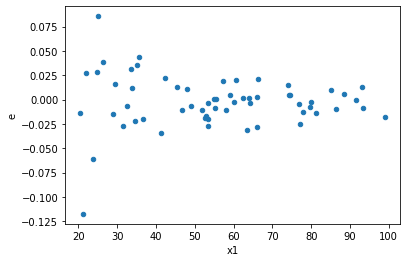

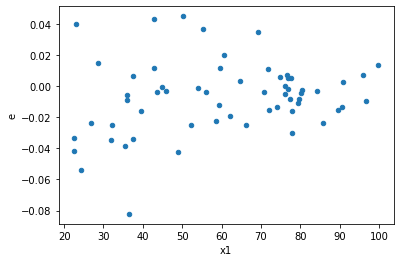

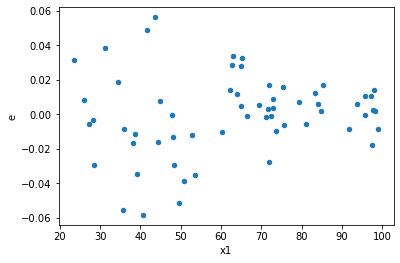

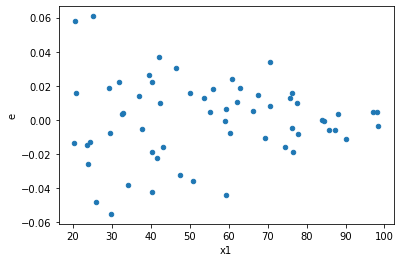

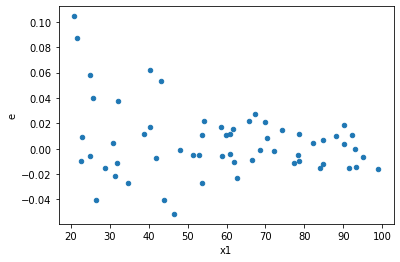

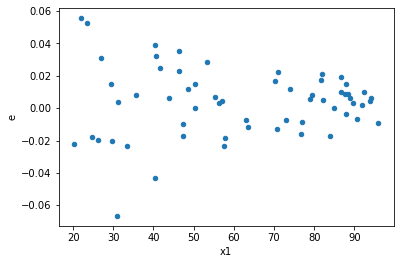

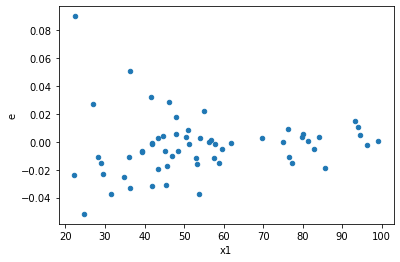

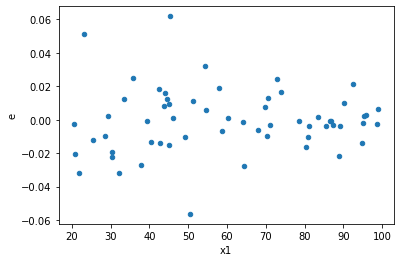

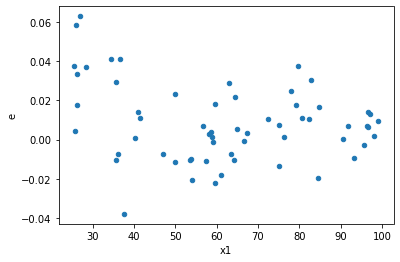

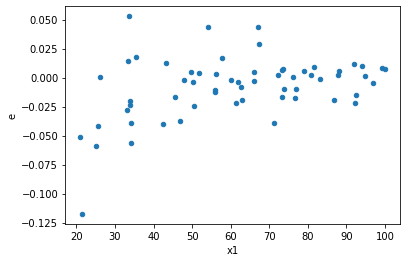

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,33.0,25.0,0.006340128126040414,0.021923220196431698,0.0001921250947284974,0.0008769288078572679,4.5643636980192746,0.00020376116559051027,0.9998981194172047,0.00010188058279525514,Reject001=0 : Heteroscedasticity
2.0,35.0,23.0,0.00568826364043218,0.02041032276795264,0.00016252181829806228,0.0008874053377370713,5.460222799806392,6.804783440195195e-05,0.999965976082799,3.402391720097597e-05,Reject001=0 : Heteroscedasticity
8.0,23.0,35.0,0.00374743987174355,0.0140815257174991,0.0001629321683366761,0.00040232930621426,2.469305541818506,0.015462928832223,0.9922685355838885,0.0077314644161115,Reject001=1 : Homoscedasticity
9.0,32.0,26.0,0.007569886262096084,0.023336034409733093,0.00023655894569050263,0.0008975397849897344,3.7941485677908515,0.0008371754334075554,0.9995814122832962,0.0004185877167037777,Reject001=0 : Heteroscedasticity
11.0,31.0,27.0,0.006594306921836818,0.02376848097588901,0.00021271957812376833,0.0008803141102181115,4.138378413414826,0.00034364292109501093,0.9998281785394525,0.00017182146054750547,Reject001=0 : Heteroscedasticity
12.0,32.0,26.0,0.004624005092378269,0.009911198460461053,0.0001445001591368209,0.00038119994078696356,2.638058968682671,0.013282846457417063,0.9933585767712915,0.006641423228708532,Reject001=1 : Homoscedasticity
13.0,38.0,20.0,0.005410033848627104,0.008771240250155249,0.00014236931180597643,0.00043856201250776244,3.080453272861521,0.009168053346229055,0.9954159733268855,0.004584026673114527,Reject001=0 : Heteroscedasticity
14.0,18.0,40.0,0.003518287162595724,0.019034516764225577,0.00019546039792198467,0.00047586291910563943,2.434574594980481,0.019227061198166417,0.9903864694009168,0.009613530599083209,Reject001=1 : Homoscedasticity
15.0,30.0,28.0,0.00479280160162147,0.027657798768480752,0.00015976005338738233,0.000987778527445741,6.18288806558295,5.795558695398384e-06,0.9999971022206523,2.897779347699192e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,27.0,0.03815758723887536,0.005039464950423273,0.001230889910931463,0.00018664685001567677,0.15163569735853447,1.5055261870421908e-06,Reject001=0 : Heteroscedasticity
1.0,33.0,25.0,0.006340128126040414,0.021923220196431698,0.0001921250947284974,0.0008769288078572679,4.5643636980192746,0.00020376116559051027,Reject001=0 : Heteroscedasticity
2.0,35.0,23.0,0.00568826364043218,0.02041032276795264,0.00016252181829806228,0.0008874053377370713,5.460222799806392,6.804783440195195e-05,Reject001=0 : Heteroscedasticity
3.0,29.0,29.0,0.025535956286664097,0.006254846442557653,0.0008805502167815206,0.00021568436008819494,0.24494271420037578,0.00029826000372677335,Reject001=0 : Heteroscedasticity
4.0,26.0,32.0,0.03470088800851798,0.005168864143048096,0.0013346495387891529,0.000161527004470253,0.12102578225651411,4.859121723702377e-07,Reject001=0 : Heteroscedasticity
5.0,29.0,29.0,0.022633849445393317,0.003588937072895513,0.0007804775670825282,0.00012375645078950044,0.1585650324994086,3.74355206284989e-06,Reject001=0 : Heteroscedasticity
6.0,43.0,15.0,0.026033920319515777,0.001139326829807429,0.0006054400074305995,7.595512198716192e-05,0.12545441506170787,7.902508710589548e-08,Reject001=0 : Heteroscedasticity
7.0,31.0,27.0,0.017245042482399994,0.0037185314671464124,0.000556291692980645,0.00013772338767208936,0.247574050466508,0.0002682200866422263,Reject001=0 : Heteroscedasticity
8.0,23.0,35.0,0.00374743987174355,0.0140815257174991,0.0001629321683366761,0.00040232930621426,2.469305541818506,0.015462928832223,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    906
Reject001=1 : Homoscedasticity       94
Name: Result_test, dtype: int64